# Implementasi Algoritma Genetika untuk Prediksi dengan MLR


## import Data
data yang dipakai adlah file csv data nilai tukar mata uang USD-JPY (2014-2016)

In [242]:
from google.colab import files
uploaded = files.upload()

Saving USDJPY2014-2016.csv to USDJPY2014-2016 (1).csv


In [243]:
import pandas as pd                      # pandas table
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
import io
df_dataset = pd.read_csv(io.BytesIO(uploaded['USDJPY2014-2016.csv']), names=['Tanggal', 'Jam', 'Open', 'High', 'Low', 'Close', 'Volume'], header=None)
# Dataset is now stored in a Pandas Dataframe00
df_dataset #uncomment for table

,Tanggal,Jam,Open,High,Low,Close,Volume
0,2014.01.02,0:00,105.294,105.435,104.538,104.776,40216
1,2014.01.03,0:00,104.782,104.864,104.067,104.767,46159
2,2014.01.06,0:00,104.817,104.942,103.904,104.199,58378
3,2014.01.07,0:00,104.198,104.726,104.164,104.575,52372
4,2014.01.08,0:00,104.570,105.113,104.567,104.831,57001
5,2014.01.09,0:00,104.830,105.050,104.575,104.812,49140
6,2014.01.10,0:00,104.800,105.321,103.825,104.068,51748
7,2014.01.13,0:00,103.967,104.127,102.842,102.979,55760
8,2014.01.14,0:00,102.974,104.271,102.961,104.199,56461
9,2014.01.15,0:00,104.204,104.689,104.083,104.545,48009


## Grafik Nilai Close
data ditampilkan dalam bentuk grafik

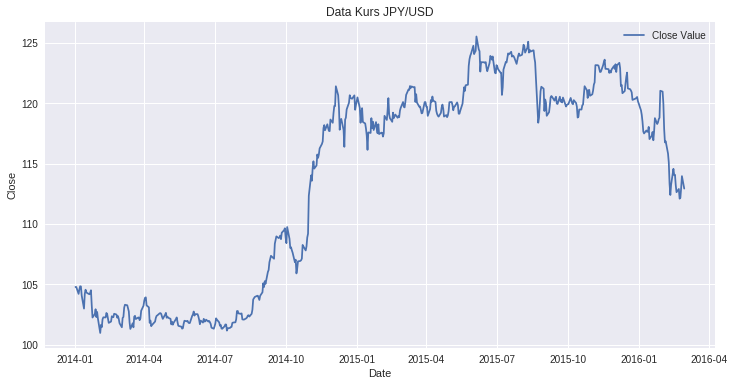

In [244]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
import csv
import datetime

date=[]
close=[]

for x in range(len(df_dataset)):
  date.append(datetime.datetime.strptime(df_dataset.at[x,'Tanggal'], '%Y.%m.%d'))
  close.append(df_dataset.at[x,'Close'])

plt.figure(figsize=(12,6))
plt.plot(date,close ,label='Close Value')
plt.xlabel('Date')
plt.ylabel('Close')

plt.title('Data Kurs JPY/USD')
plt.legend()
plt.show()

# Metode
mmelakukan prediksi dengan menggunakan multiple linear regression yang dimana nilai koefisien-koefisiennya ditentukan dengan algoritma genetika. dengan nilai slide windows = 5

![alt text](http://3.bp.blogspot.com/-wwjT9z5IA1Y/UeDLfItgVqI/AAAAAAAAAIQ/WVw9dJEH9wg/s1600/11.png "genetika")

![alt text](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704-EP713_MultivariableMethods/lessonimages/equation_image26.gif "MLR")

gambar 2 rumus multiple linear regression.

y' = nilai prediksi.
b = koefisien.
x = data sebelumnya.

## Representasi Kromosom dengan Bilangan Real

In [245]:
import random

SLIDE_WINDOWS = 5
POP_SIZE = 500  #disarankan genap
GENE_LENGTH = SLIDE_WINDOWS + 1

populasi = []

# membuat individu sebanyakk populasi awal
for x in range(POP_SIZE):
    individu = {}
    #membuat nilai random untuk setiap gen
    for y in range(GENE_LENGTH):      
      individu['thetha'+ str(y)] = random.random()
    populasi.append(individu)

# menampilkan populasi
df_koef = pd.DataFrame(list(populasi))
df_koef

,thetha0,thetha1,thetha2,thetha3,thetha4,thetha5
0,0.015157,0.981305,0.789332,0.574532,0.134672,0.277133
1,0.970824,0.089045,0.671656,0.690078,0.205200,0.868294
2,0.622526,0.301513,0.316226,0.978505,0.253040,0.254057
3,0.368566,0.285688,0.029625,0.109828,0.736237,0.623993
4,0.166482,0.576987,0.780579,0.995741,0.215630,0.101129
5,0.417707,0.697885,0.040794,0.175329,0.048851,0.595723
6,0.603820,0.717007,0.789439,0.863880,0.986101,0.031802
7,0.627410,0.271520,0.792077,0.097937,0.838715,0.725706
8,0.699728,0.829883,0.793502,0.297670,0.672217,0.402147
9,0.094350,0.071526,0.475755,0.792658,0.470110,0.794394


## Menghitung Nilai Fitness Tiap Individu 
menghitung MSE dari hasil prediksi tiap individu untuk di digunakan pada perhitungan nilai fitness

rumus MSE :

![alt text](https://study.com/cimages/multimages/16/4e7cf150-0179-4d89-86f2-5cbb1f51c266_meansquarederrorformula.png "MSE")


fitness = 1/mse+1

In [246]:
from decimal import *
getcontext().prec = 5

# menghitung MLR ===============================================================
def get_MLR(index_individu, hari_mulai):

  MLR = df_koef.iat[index_individu,0]
  # MLR = koefisien 0
  hari_ke = hari_mulai

  for y in range(SLIDE_WINDOWS):
    # MLR = MLR + kefisien * data    
    MLR = MLR + df_koef.iat[index_individu,y+1] * df_dataset.at[hari_ke,'Close']
    hari_ke += 1
  
  return MLR
#===============================================================================

# menghitung MSE ===============================================================
def get_MSE(index_individu) :
  total_square_error = 0
  end = len(df_dataset) - SLIDE_WINDOWS

  for x in range(end):
    # menghitung square error
    square_error = np.power( get_MLR(index_individu,x) - df_dataset.at[x + SLIDE_WINDOWS,'Close'], 2)
    total_square_error += square_error
  
  mse = (1 / (len(df_dataset) - SLIDE_WINDOWS)) * total_square_error
  return mse
# ==============================================================================

# menghitung fitness ===========================================================
fitness_individu = []
end = len(df_koef)

for z in range(end) :
  fitness = 1 / (get_MSE(z) + 1 )
  fitness_individu.append(fitness)
# ==============================================================================

# membuat data frame individu yaitu data koefisien + fitness ===================
df_individu = df_koef.assign(fitness = fitness_individu) 
df_individu

,thetha0,thetha1,thetha2,thetha3,thetha4,thetha5,fitness
0,0.015157,0.981305,0.789332,0.574532,0.134672,0.277133,0.000025
1,0.970824,0.089045,0.671656,0.690078,0.205200,0.868294,0.000033
2,0.622526,0.301513,0.316226,0.978505,0.253040,0.254057,0.000063
3,0.368566,0.285688,0.029625,0.109828,0.736237,0.623993,0.000124
4,0.166482,0.576987,0.780579,0.995741,0.215630,0.101129,0.000028
5,0.417707,0.697885,0.040794,0.175329,0.048851,0.595723,0.000244
6,0.603820,0.717007,0.789439,0.863880,0.986101,0.031802,0.000013
7,0.627410,0.271520,0.792077,0.097937,0.838715,0.725706,0.000026
8,0.699728,0.829883,0.793502,0.297670,0.672217,0.402147,0.000019
9,0.094350,0.071526,0.475755,0.792658,0.470110,0.794394,0.000030


## Seleksi

individu yang ada pada populasi akan dipilih untuk ke tahap selanjutnya. proses tersebut dikenal sebagai seleksi. pada algoritma genetika ada banyak metode untuk seleksi. pada kasus ini seleksi yang digunakan adalah roulette wheel. 

dimana tiap individu di representasikan sebagai elemen roulette, dan elemen yang terpilih akan masuk ke generasi berikutnya.

![alt text](http://www.edc.ncl.ac.uk/assets/hilite_graphics/rhjan07g02.png "roulette wheel")


### menghitung probabilitas tiap individu
untuk merepresentattifkan indifidu ke dalam bentuk roulette, perlu dihitung nilai probabilitas tiap individunya. dengan rumus :

probabilitas = fitness / total fitness

In [247]:
total_fitness = df_individu['fitness'].sum()
list_probabilitas = []

for x in range(len(df_individu)):
  nilai_probabilitas = df_individu.at[x,'fitness'] / total_fitness
  list_probabilitas.append(nilai_probabilitas)
  
# membuat data frame individu yaitu data koefisien + fitness
df_individu = df_individu.assign(probabilitas = list_probabilitas)
df_individu

,thetha0,thetha1,thetha2,thetha3,thetha4,thetha5,fitness,probabilitas
0,0.015157,0.981305,0.789332,0.574532,0.134672,0.277133,0.000025,0.000043
1,0.970824,0.089045,0.671656,0.690078,0.205200,0.868294,0.000033,0.000056
2,0.622526,0.301513,0.316226,0.978505,0.253040,0.254057,0.000063,0.000108
3,0.368566,0.285688,0.029625,0.109828,0.736237,0.623993,0.000124,0.000213
4,0.166482,0.576987,0.780579,0.995741,0.215630,0.101129,0.000028,0.000047
5,0.417707,0.697885,0.040794,0.175329,0.048851,0.595723,0.000244,0.000419
6,0.603820,0.717007,0.789439,0.863880,0.986101,0.031802,0.000013,0.000023
7,0.627410,0.271520,0.792077,0.097937,0.838715,0.725706,0.000026,0.000044
8,0.699728,0.829883,0.793502,0.297670,0.672217,0.402147,0.000019,0.000033
9,0.094350,0.071526,0.475755,0.792658,0.470110,0.794394,0.000030,0.000051


### visualisasi roulette wheel populasi awal

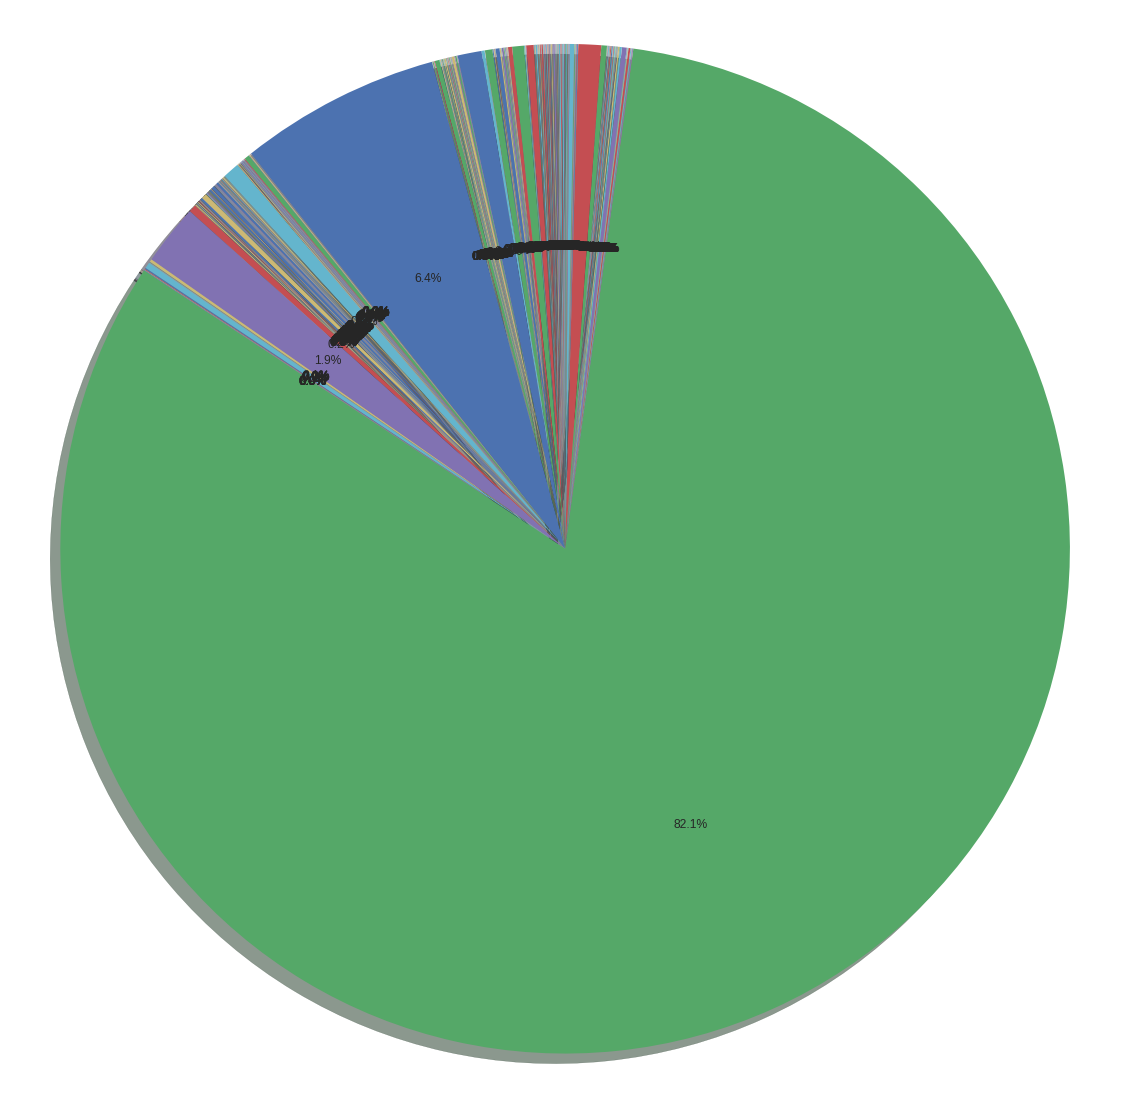

In [248]:
sizes = df_individu['probabilitas']

fig1, ax1 = plt.subplots(figsize=(20,20))
ax1.pie(sizes,  autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### memilih individu

untuk memilih individu. diberi kesempatan sebanyak jumlah populasi untuk memutar roulette. dan individu - individu yang terpilih menjadi generasi baru

In [249]:
#fungsi select
def get_select(df_populasi):
  
  r = random.random()
  #pointer pada roulette wheel
  partialsum = 0
  
  for x in range(len(df_populasi)):
    partialsum += df_populasi.at[x,'probabilitas']
    
    if partialsum > r:
      return x

terpilih = []

for y in range(len(df_individu)):
  pilih = get_select(df_individu)
  terpilih.append(pilih)

series_terpilih = pd.Series(terpilih)

# menampilkan individu terpilih
# series_terpilih

generasi_baru = []

for z in range(len(series_terpilih)):
  generasi_baru.append(df_individu.iloc[series_terpilih[z]])

generasi_baru = pd.DataFrame(generasi_baru).reset_index(drop=True)
generasi_baru

,thetha0,thetha1,thetha2,thetha3,thetha4,thetha5,fitness,probabilitas
0,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636,0.821343
1,0.388656,0.726633,0.017434,0.052038,0.249246,0.082354,0.004464,0.007676
2,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636,0.821343
3,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636,0.821343
4,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636,0.821343
5,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636,0.821343
6,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636,0.821343
7,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636,0.821343
8,0.532490,0.221584,0.177536,0.177881,0.183771,0.191221,0.037458,0.064413
9,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636,0.821343


# Crossover

setiap individu yang baru akan di kawinkan dengan individu di indeks setelahnya sehingga menghasilkan keturunan (offspring) yang akan dijadikan generasi yang baru lagi

## crossover menggunakan whole arithmetic

whole arithmetic merupakan crossover yang merubah seluruh nilai gen pada tiap kromosom individu parentnya

![teks alternatif](https://slideplayer.com/slide/6277398/21/images/36/Whole+arithmetic+crossover.jpg)

In [250]:
#tentukan nilai alfha
alfha = 0.4

list_offspring = []

#whole arithmetic crossover=============================================
def cross_over(p1,p2,list_offspring):
  
  offspring1 = {}
  for x in range(SLIDE_WINDOWS+1):
    offspring1['thetha'+ str(x)] = alfha*p1.iat[x] + (1-alfha)*p2.iat[x]
  list_offspring.append(offspring1)

  offspring2 = {}
  for x in range(SLIDE_WINDOWS+1):
    offspring2['thetha'+ str(x)] = alfha*p2.iat[x] + (1-alfha)*p1.iat[x]
  list_offspring.append(offspring2)

#prob cross ==============================================================
probabilitas_crossover = 0.6
jumlah_parent = round(len(generasi_baru) * probabilitas_crossover)
#=========================================================================

#melakukan crossover
for x in range(jumlah_parent):
  #jika ganjil jadi parent 1
  if ((x+1) % 2) == 1:
    parent1 = generasi_baru.iloc[x]
  #jika ganjil jadi parent 2
  if ((x+1) % 2) == 0:
    parent2 = generasi_baru.iloc[x]
    #jika parent sudah 2 bisa di crossover
    cross_over(parent1,parent2,list_offspring)

hasil_anak = pd.DataFrame(list_offspring)

#update generasi baru=======================================================
generasi_baru = generasi_baru.drop("fitness", axis=1)
generasi_baru = generasi_baru.drop("probabilitas", axis=1)
generasi_baru.update(hasil_anak)
#===========================================================================
print(generasi_baru)

      thetha0   thetha1   thetha2   thetha3   thetha4   thetha5
0    0.366094  0.568393  0.057120  0.101041  0.252028  0.095723
1    0.354813  0.489272  0.076964  0.125542  0.253419  0.102408
2    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
3    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
4    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
5    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
6    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
7    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
8    0.412346  0.287253  0.141005  0.175879  0.227229  0.145954
9    0.452394  0.265364  0.153182  0.176546  0.212743  0.161043
10   0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
11   0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
12   0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
13   0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
14   0.216603  0.259924  0.235715  0.127

# mutasi
mutasi merupakan perubahan gen pada suatu kromosom sebanyak probabilitass yang di tentukan.
gen yang terpilih akan dikalikan dengan nilai random antara 0.1 sampai dengan 1.1

In [251]:
probabilitas_jumlah_terpilih = 0.2
banyak_yang_terpilih = round(POP_SIZE * probabilitas_jumlah_terpilih)

# memilih individu =============================================================
indeks_terpilih = []

for x in range(banyak_yang_terpilih):
  r = random.randint(0, len(generasi_baru)-1)
  if (x) == 0:    
    indeks_terpilih.append(r)
  else:
    # untuk menghindari duplikat
    while r in indeks_terpilih:
      r = random.randint(0, len(generasi_baru)-1)
    indeks_terpilih.append(r)
# ==============================================================================

# mutasi =======================================================================
for x in range(len(indeks_terpilih)):
  #menentukan index gene yang dirubah
  igen_change = random.randint(0, GENE_LENGTH-1)
  
  #angka random dari 0.1 - 1.1 (pengubah nilai gen)
  gene_changer = random.uniform(0.1, 1.1)
  
  #merubah gen
  gene_change = generasi_baru.iloc[indeks_terpilih[x],igen_change] * gene_changer
  
  #update gene
  generasi_baru.iloc[indeks_terpilih[x],igen_change] = gene_change
#===============================================================================

print(generasi_baru)

      thetha0   thetha1   thetha2   thetha3   thetha4   thetha5
0    0.366094  0.568393  0.057120  0.101041  0.252028  0.095723
1    0.354813  0.489272  0.076964  0.125542  0.253419  0.027480
2    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
3    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
4    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
5    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
6    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
7    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
8    0.412346  0.287253  0.141005  0.175879  0.227229  0.145954
9    0.452394  0.265364  0.153182  0.176546  0.212743  0.161043
10   0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
11   0.121215  0.331032  0.116650  0.174545  0.256202  0.115777
12   0.332251  0.331032  0.116650  0.174545  0.256202  0.050622
13   0.332251  0.331032  0.116650  0.174545  0.256202  0.115777
14   0.216603  0.259924  0.235715  0.127

# elitism
elitism adalah proses untuk melakukan update generasi dari populasi terdahulu dan populasi baru.

metode yang dipilih untuk etilism pada kasus ini adalah metode holland. Yaitu individu yang survive adalah hanya individu offspring sehingga individu pada populasi sebelumnya dihilangkan.

In [252]:
# menghitung fitness ===========================================================
fitness_individu = []

end = len(df_koef)

for z in range(end) :
  fitness = 1 / (get_MSE(z) + 1 )
  fitness_individu.append(fitness)

# membuat data frame individu yaitu data koefisien + fitness
generasi_baru = generasi_baru.assign(fitness = fitness_individu) 

# elitism dengan metode state update ============================================
#mengahpus probabilitas sebelumnya (axis = 0 baris, 1 kolom)
df_individu = df_individu.drop(['probabilitas'], axis=1)

# menggabungkan populasi lama dengan yang baru
df_individu = df_individu.append(generasi_baru)

# rangking individu sesuai fitness
df_individu = df_individu.sort_values(by='fitness', ascending=False).reset_index(drop=True)

#hanya ambil individu sebanyak populasi size
df_individu = df_individu[:POP_SIZE]

#etilism dengan metode golland =================================================
#df_individu = generasi_baru
print(df_individu)


      thetha0   thetha1   thetha2   thetha3   thetha4   thetha5   fitness
0    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.477636
1    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.477636
2    0.532490  0.221584  0.177536  0.177881  0.183771  0.191221  0.037458
3    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.037458
4    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.011322
5    0.867681  0.420051  0.347412  0.139849  0.083629  0.083313  0.011322
6    0.388656  0.726633  0.017434  0.052038  0.249246  0.082354  0.004464
7    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.004464
8    0.201316  0.203964  0.404084  0.125470  0.288856  0.110518  0.004232
9    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.004232
10   0.524900  0.443824  0.480549  0.631005  0.386851  0.344578  0.003105
11   0.139504  0.212519  0.315092  0.095766  0.212495  0.006435  0.003105
12   0.263095  0.160217  0.048041  0.1

#mendapatkan kromosom terbaik

In [253]:
best_kromosom = df_individu.iloc[0]
best_kromosom

thetha0    0.332251
thetha1    0.331032
thetha2    0.116650
thetha3    0.174545
thetha4    0.256202
thetha5    0.115777
fitness    0.477636
Name: 0, dtype: float64

# iterasi
iterasi mulai dari proses crossover hingga mutasi senbanyak iterasi yang ditentukan

In [254]:
#constraint
#tentukan banyaknya iterasi
ITERATE = 20
#fitness yang diharapkan
CONSTRAINT_FITNESS = 0.8


# fungsi hitung fitness==========================================================
def get_fitness(df_koef):
  
  # menghitung fitness =========================================================
  fitness_individu = []
  end = len(df_koef)

  for z in range(end) :
    fitness = 1 / (get_MSE(z) + 1 )
    fitness_individu.append(fitness)

  # membuat data frame individu yaitu data koefisien + fitness
  df_koef = df_koef.assign(fitness = fitness_individu) 
  return df_koef
# ==============================================================================

# fungsi hitung probabilitas:====================================================
def get_probabilitas(df_individu):
  
  total_fitness = df_individu['fitness'].sum()
  list_probabilitas = []

  for x in range(len(df_individu)):
    nilai_probabilitas = df_individu.at[x,'fitness'] / total_fitness
    list_probabilitas.append(nilai_probabilitas)

  # membuat data frame individu yaitu data koefisien + fitness
  df_individu = df_individu.assign(probabilitas = list_probabilitas)
  return df_individu
# ==============================================================================

#fungsi seleksi=================================================================
def get_seleksi(df_individu):
  
  terpilih = []

  for y in range(len(df_individu)):
    pilih = get_select(df_individu)
    terpilih.append(pilih)

  series_terpilih = pd.Series(terpilih)
  # menampilkan individu terpilih
  series_terpilih
  generasi_baru = []

  for z in range(len(series_terpilih)):
    generasi_baru.append(df_individu.iloc[series_terpilih[z]])

  generasi_baru = pd.DataFrame(generasi_baru).reset_index(drop=True)
  return generasi_baru
#===============================================================================

# fungsi crossover==============================================================
def get_crossover(generasi_baru):
  
  #tentukan nilai alfha
  alfha = 0.4
  list_offspring = []

  #melakukan crossover
  for x in range(len(generasi_baru)):
    
    #jika ganjil jadi parent 1
    if ((x+1) % 2) == 1:
      parent1 = generasi_baru.iloc[x]
      
    #jika ganjil jadi parent 2
    if ((x+1) % 2) == 0:      
      parent2 = generasi_baru.iloc[x]
      #jika parent sudah 2 bisa di crossover
      cross_over(parent1,parent2,list_offspring)

  generasi_baru = pd.DataFrame(list_offspring)
  return generasi_baru
#===============================================================================

# fungsi mutasi ================================================================
def mutation(generasi_baru, probabilitas, banyak_poppulasi, panjang_gen):
  
  probabilitas_jumlah_terpilih = probabilitas
  banyak_yang_terpilih = round(banyak_poppulasi * probabilitas_jumlah_terpilih)

  # memilih individu =============================
  indeks_terpilih = []

  for x in range(banyak_yang_terpilih):    
    r = random.randint(0, len(generasi_baru)-1)
    
    if (x) == 0:    
      indeks_terpilih.append(r)
    else:
      # untuk menghindari duplikat
      while r in indeks_terpilih:
        r = random.randint(0, len(generasi_baru)-1)
        
      indeks_terpilih.append(r)
  # ===============================================

  # mutasi ========================================
  for x in range(len(indeks_terpilih)):
    #menentukan index gene yang dirubah
    igen_change = random.randint(0, panjang_gen-1)

    #angka random dari 0.1 - 1.1 (pengubah nilai gen)
    gene_changer = random.uniform(0.1, 1.1)

    #merubah gen
    gene_change = generasi_baru.iloc[indeks_terpilih[x],igen_change] * gene_changer

    #update gene
    generasi_baru.iloc[indeks_terpilih[x],igen_change] = gene_change
    return generasi_baru
#===============================================================================

#===============================================================================
def elitism(populasi_lama, generasi_baru):
  populasi_lama = generasi_baru
  # menghitung fitness
  populasi_lama = get_fitness(populasi_lama)
  return populasi_lama
#===============================================================================

#===============================================================================
def elitism_update(populasi_lama, generasi_baru):
  
  # menghitung fitness
  generasi_baru = get_fitness(generasi_baru)
  
  # elitism dengan metode state update ============================================
  #mengahpus probabilitas sebelumnya (axis = 0 baris, 1 kolom)
  populasi_lama = populasi_lama.drop(['probabilitas'], axis=1)

  # menggabungkan populasi lama dengan yang baru
  populasi_lama = populasi_lama.append(generasi_baru)

  # rangking individu sesuai fitness
  populasi_lama = populasi_lama.sort_values(by='fitness', ascending=False).reset_index(drop=True)

  #hanya ambil individu sebanyak populasi size
  populasi_lama = populasi_lama[:POP_SIZE]
  
  return populasi_lama
#===============================================================================

#===============================================================================
def get_best(df_individu):
  best_kromosom = df_individu.iloc[0]                             
  return best_kromosom
#===============================================================================

i = 0
while (i < ITERATE) and (best_kromosom['fitness'] < CONSTRAINT_FITNESS):
  
  # menghitung probabilitas
  df_individu = get_probabilitas(df_individu)
  
  # seleksi individu
  generasi_baru = get_seleksi(df_individu)
  
  # crossover
  generasi_baru = get_crossover(generasi_baru)
  
  #mutasi
  generasi_baru = mutation(generasi_baru, 0.2, POP_SIZE, GENE_LENGTH)
  
  #etilism
  df_individu = elitism_update(df_individu, generasi_baru)
  
  #best individu
  best_kromosom = get_best(df_individu)
  
  i += 1
  
#df_individu = get_fitness(df_individu)
df_individu

,thetha0,thetha1,thetha2,thetha3,thetha4,thetha5,fitness
0,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636
1,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636
2,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636
3,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636
4,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636
5,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636
6,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636
7,0.412346,0.287253,0.141005,0.175879,0.227229,0.145954,0.477636
8,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636
9,0.332251,0.331032,0.116650,0.174545,0.256202,0.115777,0.477636


# memilih individu terbaik
individu yang terbaik yaitu individu dengan nilai fitness terbesar.

In [255]:
result = df_individu.sort_values(by='fitness', ascending=False).reset_index(drop=True)
best_kromosom = result.iloc[0]
print('individu terbaik yaitu :')
print(best_kromosom)
print('dari :')
print(result)

individu terbaik yaitu :
thetha0    0.332251
thetha1    0.331032
thetha2    0.116650
thetha3    0.174545
thetha4    0.256202
thetha5    0.115777
fitness    0.477636
Name: 0, dtype: float64
dari :
      thetha0   thetha1   thetha2   thetha3   thetha4   thetha5   fitness
0    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.477636
1    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.477636
2    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.477636
3    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.477636
4    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.477636
5    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.477636
6    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.477636
7    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.477636
8    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777  0.477636
9    0.332251  0.331032  0.116650  0.174545  0.256202  0.115777 

#MLR dengan menggunakan koefisien hasil algoritma genetika
setelah didapat individu terbaik yaitu individu yang mempunyai koefisien-koefisien dengan nilai fitness terbesar. koefisien-koefisien tersebut akan dimasukkan dalam perhitungan MLR untuk prediksi nilai tukar mata uang

In [256]:
list_prediksi = []
end = len(df_dataset) - SLIDE_WINDOWS

# menghitung MLR ====================================================
for x in range(end):
  
  MLR = best_kromosom[0]
  hari_mulai = x
  
  for y in range(SLIDE_WINDOWS):
    
    MLR = MLR + best_kromosom[y+1] * df_dataset.at[hari_mulai,'Close']
    hari_mulai += 1
  
  list_prediksi.append(MLR)
# ====================================================================

# menghitung mse ====================================================
total_square_error = 0
end = len(df_dataset) - SLIDE_WINDOWS

for x in range(end):
  # menghitung square error
  square_error = np.power( list_prediksi[x] - df_dataset.at[x + SLIDE_WINDOWS,'Close'], 2)
  total_square_error += square_error
  
mse = (1 / len(list_prediksi)) * total_square_error
# ====================================================================

print(list_prediksi)
print('mse : ' + str(mse))

[104.35435092641643, 104.4141313109709, 104.2236430704872, 104.05796181920724, 103.87287204977196, 103.94234033417644, 103.84676131096553, 103.62843828498414, 104.00738016544936, 104.07330068204914, 104.03451039996456, 103.93172273363128, 103.51213447299149, 103.13326773013159, 103.0013413583072, 102.548071946311, 102.1966957311283, 102.2711361423794, 102.12147615478007, 101.63164012160853, 101.6503904644157, 101.47306428858992, 101.30961778425771, 101.66473764305151, 101.74535350000527, 102.06362330419623, 102.11342372390709, 102.00146104455018, 101.96976307399449, 101.91060454565974, 101.87488248484208, 101.8278350911102, 101.93271600256016, 102.13365316992416, 102.11599271354986, 102.07736344770217, 102.12475005080155, 101.99419362347813, 101.75255509707351, 101.71034668300362, 101.7394029402856, 101.82952608776202, 102.0481738187634, 102.50427150642103, 102.62430153883983, 102.80697280412244, 102.66493918677686, 102.27858038005789, 101.92470329071011, 101.71682141598644, 101.449153

# visualisasi regresi


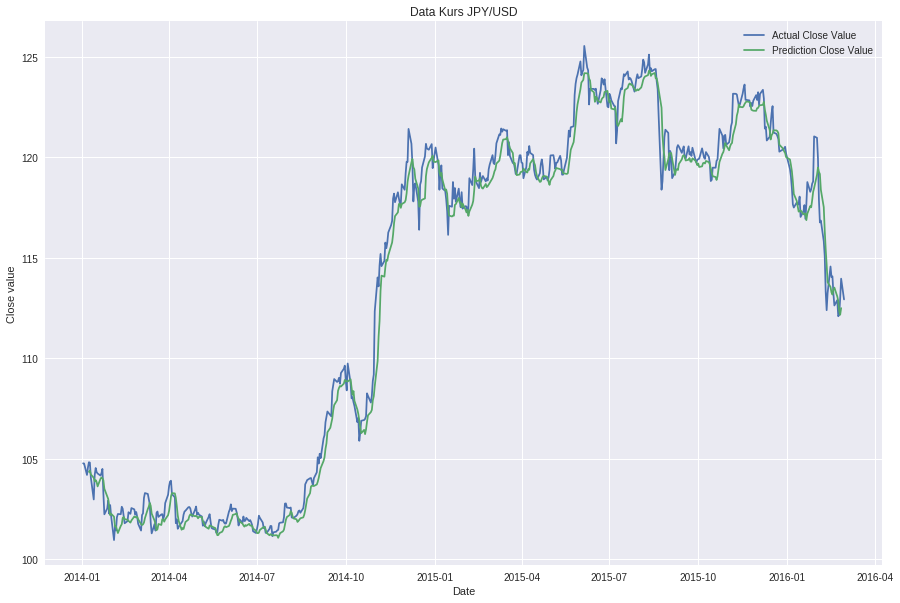

In [257]:

grafik = []

indeks_prediksi = 0

#meng copy data tanggal
for x in range(SLIDE_WINDOWS-1,len(df_dataset)-1):
  
  temp = {'Tanggal': datetime.datetime.strptime(df_dataset.at[x,'Tanggal'], '%Y.%m.%d'),'Close':list_prediksi[indeks_prediksi]}
  indeks_prediksi += 1 
  grafik.append(temp)

df_prediksi = pd.DataFrame(list(grafik))

#print(df_prediksi['Close'])

date=[]
close=[]

for x in range(len(df_dataset)):
  date.append(datetime.datetime.strptime(df_dataset.at[x,'Tanggal'], '%Y.%m.%d'))
  close.append(df_dataset.at[x,'Close'])


plt.figure(figsize=(15,10))
plt.plot(date, close, label='Actual Close Value')
#plt.ylabel('Prediction Close')

plt.plot(df_prediksi['Tanggal'], df_prediksi['Close'], label='Prediction Close Value')
plt.xlabel('Date')
plt.ylabel('Close value')
#plt.ylabel('Prediction Close')

plt.title('Data Kurs JPY/USD')
plt.legend()
plt.show()

# refrensi
[Genetic Algorithms 15/30: Java Implementation of the Roulette Wheel Selection Method](https://www.youtube.com/watch?v=9JzFcGdpT8E)

[Genetic Algorithm](https://www.youtube.com/watch?v=JgqBM7JG9ew)

[Python Genetic Algorithm 10 Crossover](https://www.youtube.com/watch?v=Z1AO0oylTCc)

[Genetic Algorithm (GA) Optimization - Step by Step Example with Python Implementation](https://www.youtube.com/watch?v=sjddXIc_B20&feature=youtu.be)

[REDIKSI NILAI TUKAR MATA UANG DALAM SISTEM FOREX TRADING MENGGUNAKAN ALGORITMA GENETIKA](http://etd.repository.ugm.ac.id/downloadfile/96365/potongan/S1-2016-334626-abstract.pdf)